## Imports

In [ ]:
# Data Analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Model training | SKLearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics

# Model training| Imblearn
from imblearn.over_sampling import SMOTE

# Othe
from google.colab import drive
import joblib

##Notebook setup

In [ ]:
drive.mount('/content/drive')
sb.set_style('whitegrid')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data importation

In [ ]:
mpu_on_df = pd.read_csv('/content/drive/MyDrive/Francis MPU Project/giroscope_mpu_on.csv')
mpu_off_df = pd.read_csv('/content/drive/MyDrive/Francis MPU Project/giroscope_mpu_off.csv')
mpu_live_df = pd.read_csv('/content/drive/MyDrive/Francis MPU Project/giroscope_mpu_live.csv')

## Data Analysis

###MPU ON

In [ ]:
print(f'{mpu_on_df.info()}\n')
print(f'{mpu_on_df.describe()}\n')
mpu_on_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          60 non-null     int64  
 1   x           60 non-null     int64  
 2   y           60 non-null     int64  
 3   z           60 non-null     int64  
 4   date_mpu    60 non-null     object 
 5   time_mpu    60 non-null     object 
 6   time_float  60 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.4+ KB
None

              id             x             y             z  time_float
count  60.000000     60.000000     60.000000     60.000000   60.000000
mean   30.500000   -833.466667   -799.933333  14364.066667   17.023232
std    17.464249   6268.435989   5328.152362   2362.055467    0.372552
min     1.000000 -22248.000000  -8468.000000   8444.000000   16.589400
25%    15.750000  -4829.000000  -4731.000000  13286.000000   16.654475
50%    30.500000   -916.000000  -19

,id,x,y,z,date_mpu,time_mpu,time_float
0,1,-852,-6288,13332,2022-03-24,17:08:00,17.1333
1,2,-11240,-4752,11148,2022-03-24,17:08:18,17.1383
2,3,288,-1656,8444,2022-03-24,17:08:33,17.1425
3,4,6144,-4272,17420,2022-03-24,17:08:49,17.1469
4,5,1420,900,15400,2022-03-24,17:09:05,17.1514


Text(0.5, 0, 'Z')

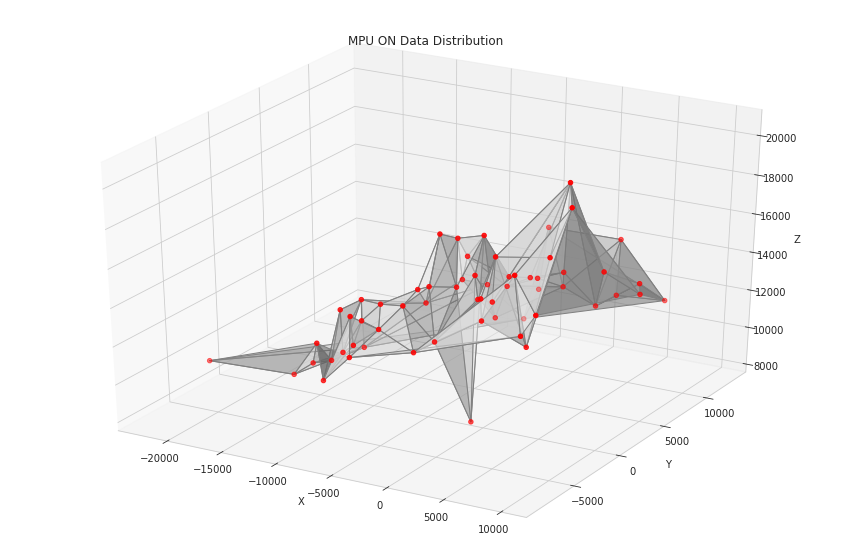

In [ ]:
x, y, z = mpu_on_df['x'], mpu_on_df['y'], mpu_on_df['z']

fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5) 
ax.scatter(x, y, z, c='red') 
ax.set_title('MPU ON Data Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [ ]:
# Add 'Hard Move' column
mpu_on_df['Hard Move'] = [1] * mpu_on_df.shape[0]

### MPU OFF

In [ ]:
print(f'{mpu_off_df.info()}\n')
print(f'{mpu_off_df.describe()}\n')
mpu_off_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          642 non-null    int64  
 1   x           642 non-null    int64  
 2   y           642 non-null    int64  
 3   z           642 non-null    int64  
 4   date_mpu    642 non-null    object 
 5   time_mpu    642 non-null    object 
 6   time_float  642 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 35.2+ KB
None

               id            x            y             z  time_float
count  642.000000   642.000000   642.000000    642.000000  642.000000
mean   421.500000 -1187.638629   981.115265  15721.925234   21.746695
std    185.473718    40.808295    49.335324     74.339572    0.808429
min    101.000000 -1412.000000   852.000000  15324.000000   20.349700
25%    261.250000 -1212.000000   956.000000  15676.000000   21.047500
50%    421.500000 -1188.000000   980.0

,id,x,y,z,date_mpu,time_mpu,time_float
0,101,-1412,1064,15756,2022-03-25,20:20:59,20.3497
1,102,-1232,1000,15732,2022-03-25,20:21:16,20.3544
2,103,-1112,1000,15648,2022-03-25,20:21:32,20.3589
3,104,-1164,1000,15684,2022-03-25,20:21:48,20.3633
4,105,-1196,892,15768,2022-03-25,20:22:03,20.3675


Text(0.5, 0, 'Z')

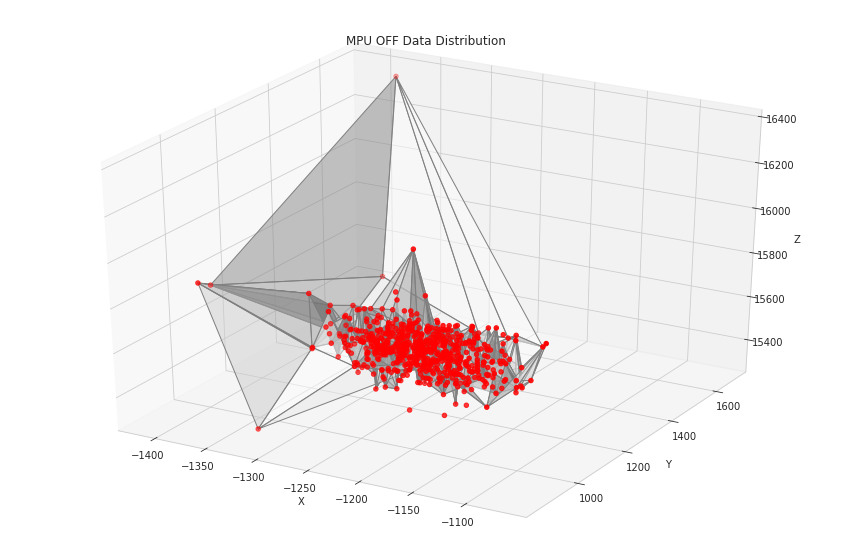

In [ ]:
x, y, z = mpu_off_df['x'], mpu_off_df['y'], mpu_off_df['z']

fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5) 
ax.set_title('MPU OFF Data Distribution')
ax.scatter(x, y, z, c='red') 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [ ]:
# Add 'Hard Move' column
mpu_off_df['Hard Move'] = [0] * mpu_off_df.shape[0]

### MPU LIVE

* The purpose of live data is only for model testing

In [ ]:
print(f'{mpu_live_df.info()}\n')
mpu_live_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          203 non-null    int64  
 1   x           203 non-null    int64  
 2   y           203 non-null    int64  
 3   z           203 non-null    int64  
 4   date_mpu    203 non-null    object 
 5   time_mpu    203 non-null    object 
 6   time_float  203 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 11.2+ KB
None



,id,x,y,z,date_mpu,time_mpu,time_float
0,1,5548,10208,13412,2022-03-26,01:54:56,1.91556
1,2,12820,12036,12328,2022-03-26,01:55:13,1.92028
2,3,-5872,-1296,15004,2022-03-26,01:55:29,1.92472
3,4,-5600,16572,18640,2022-03-26,01:55:45,1.92917
4,5,-25444,3296,32767,2022-03-26,01:56:00,1.93333


Text(0.5, 0, 'Z')

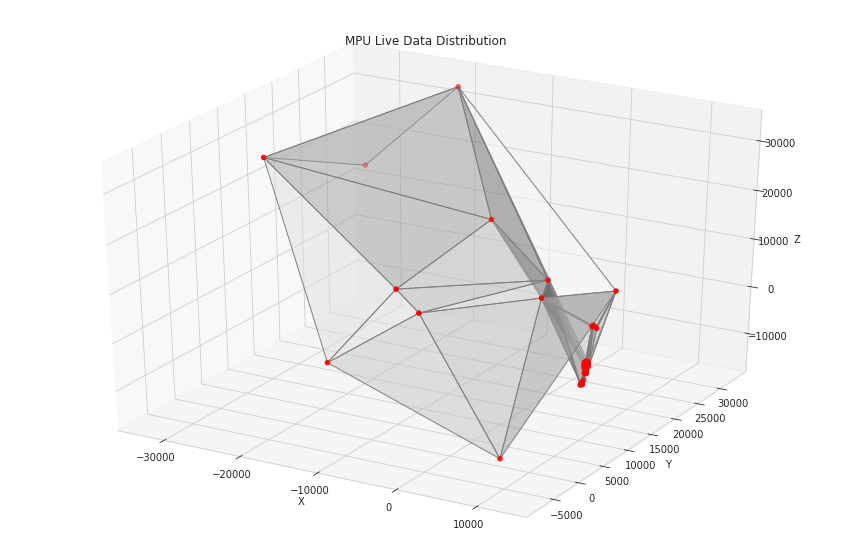

In [ ]:
x, y, z = mpu_live_df['x'], mpu_live_df['y'], mpu_live_df['z']

fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5) 
ax.scatter(x, y, z, c='red') 
ax.set_title('MPU Live Data Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Join on and off mpu data into a single daa frame.

In [ ]:
# Join on and off mpu data into a single daa frame.
mpu_df = pd.concat([mpu_on_df, mpu_off_df])

In [ ]:
mpu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 641
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          702 non-null    int64  
 1   x           702 non-null    int64  
 2   y           702 non-null    int64  
 3   z           702 non-null    int64  
 4   date_mpu    702 non-null    object 
 5   time_mpu    702 non-null    object 
 6   time_float  702 non-null    float64
 7   Hard Move   702 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 49.4+ KB


In [ ]:
mpu_df.head()

,id,x,y,z,date_mpu,time_mpu,time_float,Hard Move
0,1,-852,-6288,13332,2022-03-24,17:08:00,17.1333,1
1,2,-11240,-4752,11148,2022-03-24,17:08:18,17.1383,1
2,3,288,-1656,8444,2022-03-24,17:08:33,17.1425,1
3,4,6144,-4272,17420,2022-03-24,17:08:49,17.1469,1
4,5,1420,900,15400,2022-03-24,17:09:05,17.1514,1


In [ ]:
mpu_df.tail()

,id,x,y,z,date_mpu,time_mpu,time_float,Hard Move
637,738,-1152,980,15592,2022-03-25,23:07:32,23.1256,0
638,739,-1160,1016,15780,2022-03-25,23:07:48,23.1300,0
639,740,-1204,980,15760,2022-03-25,23:08:03,23.1342,0
640,741,-1184,952,15776,2022-03-25,23:08:19,23.1386,0
641,742,-1256,908,15876,2022-03-25,23:08:35,23.1431,0


## Model training

In [ ]:
# Use SMOTE for data augmentation
sm = SMOTE(random_state=42)

mpu_df.drop(['id', 'date_mpu', 'time_mpu', 'time_float'], axis=1, inplace=True)

X = mpu_df[['x', 'y', 'z']]
Y = mpu_df['Hard Move']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25, random_state=0, stratify=Y)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_res, y_res)

log_reg_preds = log_reg.predict(x_test)

## Outcome Evaluation

In [ ]:
log_reg_score = log_reg.score(x_test, y_test)
print(f'Logistic Regression Score: {log_reg_score}')

Logistic Regression Score: 0.9772727272727273


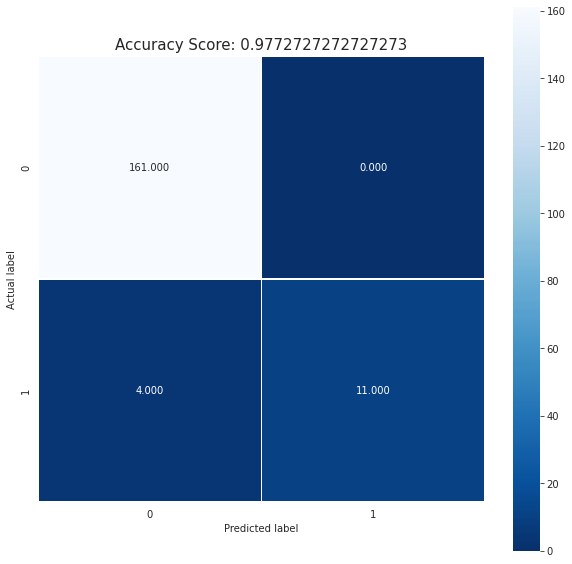

In [ ]:
cm = metrics.confusion_matrix(y_test, log_reg_preds)

plt.figure(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_score)
plt.title(all_sample_title, size = 15);

## Model Exportation

Even though we got good results with bayesian classifier, I decided to work with logistic regression because it was easier for to work with the .pkl file.

In [ ]:
joblib.dump(log_reg, 'log_reg.pkl', compress=9)

['log_reg.pkl']